# Practical 8

Build a neural network model using a small dataset using existing libraries, and explain and visualise the learning process, including weights and activations.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

In [22]:
# --- Create small dataset ---

X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

In [23]:
# --- Split and scale ---

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

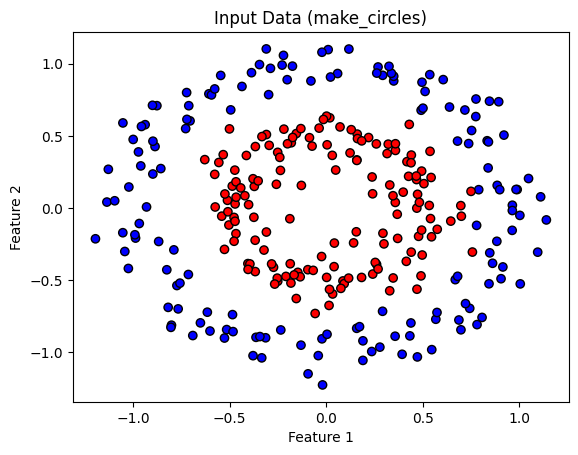

In [24]:
# --- Visualize dataset ---

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Input Data (make_circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [25]:
# --- Build Neural Network Model ---

model = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(8, activation='tanh', name='hidden_layer1'),
    layers.Dense(4, activation='tanh', name='hidden_layer2'),
    layers.Dense(1, activation='sigmoid', name='output_layer')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer1 (Dense)           │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# --- Train Model ---

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    verbose=0)

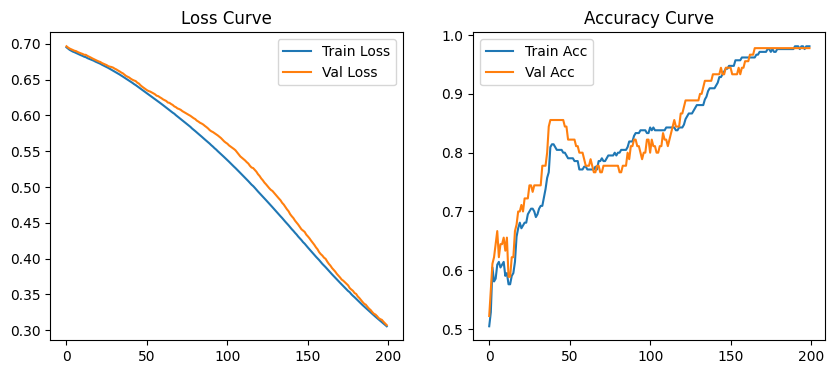

In [27]:
# --- Plot Learning Curves ---

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.legend()

plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


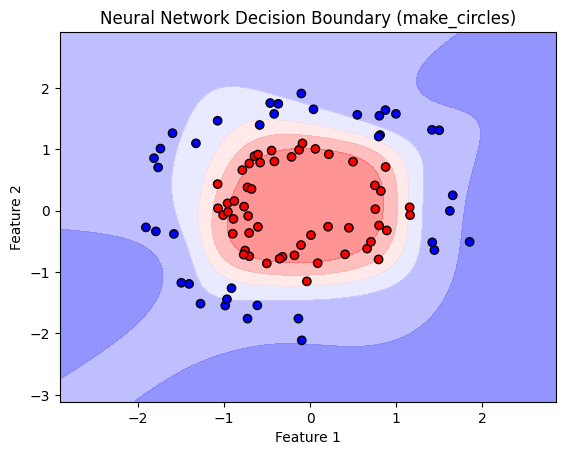

In [28]:
# --- Visualize Decision Boundary ---

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, cmap='bwr', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model, X_test, y_test, "Neural Network Decision Boundary (make_circles)")

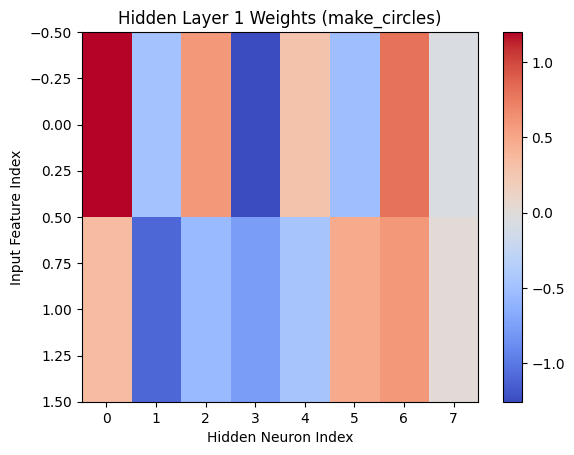

In [29]:
# --- Extract and Visualize Weights ---

weights, biases = model.get_layer('hidden_layer1').get_weights()
plt.imshow(weights, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title("Hidden Layer 1 Weights (make_circles)")
plt.xlabel("Hidden Neuron Index")
plt.ylabel("Input Feature Index")
plt.show()